In [1]:
import pandas as pd 
import numpy as np

In [2]:
medal_count = pd.read_excel("Medals.xlsx")
medal_count

c:\Users\1\anaconda3\envs\hands_on_machine_learning\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


# Estimate of Location


In [3]:
medal_count["Gold"].mean()


3.6559139784946235

In [3]:
# weighted MEAN 
# WHEN YOU TRY TO COMPARE THE MEAN OF SOMETHING BY REFERIING TO AN ANOTHER)
import numpy as np
np.average(medal_count["Gold"].mean(),weights=medal_count["Total"].mean())  

3.655913978494623

In [5]:
np.average(medal_count["Silver"].mean(),weights=medal_count["Total"].mean())

3.6344086021505375

In [6]:
medal_count["Silver"].mean()

3.6344086021505375

In [4]:
# Trim mean 
from scipy.stats import trim_mean 
trim_mean(medal_count["Gold"],0.1)



1.96

In [8]:

medal_count["Gold"].median()

1.0

In [9]:
import pandas as pd 
def weighted_median(df,median_col,weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() /2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count,"Total","Gold")

40

In [9]:
import numpy as np 
q3 = np.percentile(medal_count["Total"],75)
q3

11.0

In [10]:
import numpy as np 
q3 = np.percentile(medal_count["Gold"],75)
q3

3.0

In [11]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


# ESTIMATES OF VARIABILITY (DISPERSION METRICS)

In [38]:
from statistics import variance
variance(medal_count["Bronze"])

38.5687237026648

In [39]:
from statistics import stdev
stdev(medal_count["Bronze"])

6.21037226763942

In [43]:
from numpy import mean, absolute
mean(absolute(medal_count["Bronze"]-mean(medal_count["Bronze"])))

4.256677072493929

In [44]:
from numpy import median,absolute 
median(absolute(medal_count["Bronze"]-median(medal_count["Bronze"])))

2.0

In [46]:
import numpy as np
q3, q1 = np.percentile(medal_count["Bronze"],[75,25])
iqr = q3 - q1
iqr

4.0

In [12]:
q3, q1 = np.percentile(medal_count["Gold"],[75,25])
iqr = q3 - q1
iqr

3.0

# Exploring the data distribution

<Axes: >

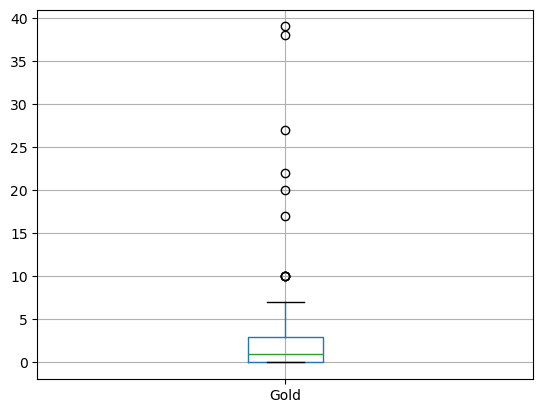

In [13]:
# Box plots
medal_count.boxplot(column="Gold",by=None,ax=None)

In [11]:
#Frequency table 
frequency_table = medal_count.copy()
frequency_table["freq"]= pd.cut(medal_count["Gold"],10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

C:\Users\1\AppData\Local\Temp\ipykernel_11060\1230863520.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_table.groupby("freq")["Rank"].count().reset_index()


,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


<Axes: >

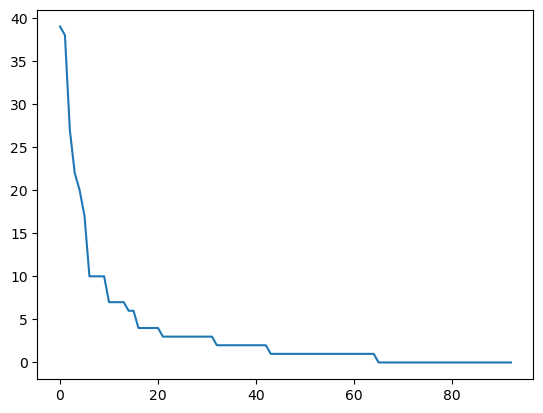

In [12]:
medal_count["Gold"].plot()

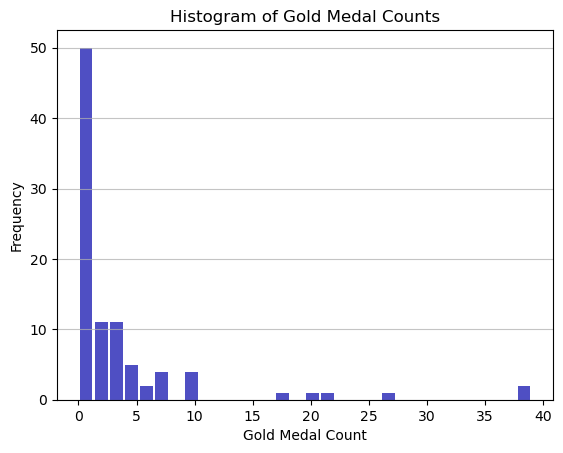

In [20]:
import matplotlib.pyplot as plt

plt.hist(x=medal_count["Gold"], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlabel('Gold Medal Count')
plt.ylabel('Frequency')
plt.title('Histogram of Gold Medal Counts')
plt.grid(axis='y', alpha=0.75)
plt.show()


Text(0.5, 0, 'golden medal count ')

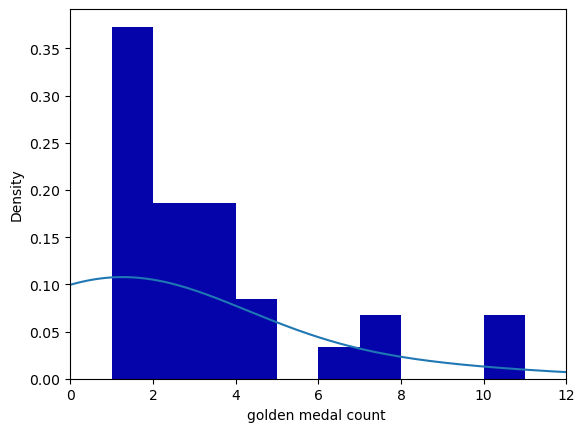

In [21]:
# Density plot 
ax = medal_count["Gold"].plot.hist(density=True,xlim = [0,12] , bins=range(1,12), color='#0504aa')
medal_count["Gold"].plot.density(ax=ax)
ax.set_xlabel('golden medal count ')



# Exploring binary and Categorical Data 

In [13]:
# Mode

medal_count["Gold"].mode()

0    0
Name: Gold, dtype: int64

Text(0, 0.5, 'Country')

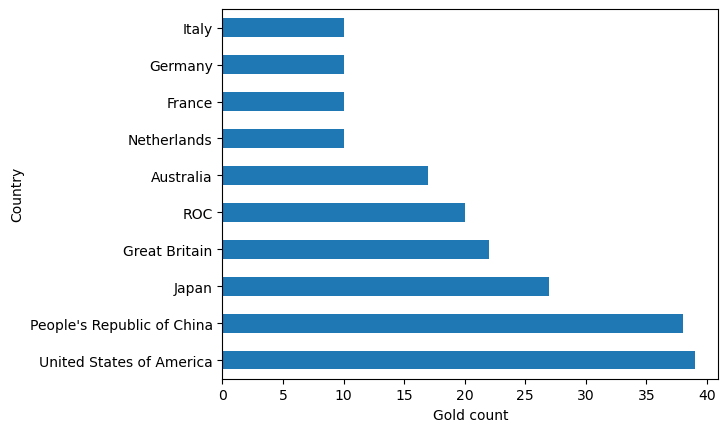

In [15]:
# barh chart
ax = medal_count.iloc[:10, :].plot.barh(x="Team/NOC",y="Gold",legend = False)
ax.set_xlabel('Gold count')
ax.set_ylabel('Country')


## Correlation


In [37]:
# Assuming medal_count is a DataFrame containing numerical columns
numerical_columns = medal_count.select_dtypes(include=[np.number])
correlation_matrix = numerical_columns.corr()
correlation_matrix


,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<Axes: xlabel='Gold', ylabel='Silver'>

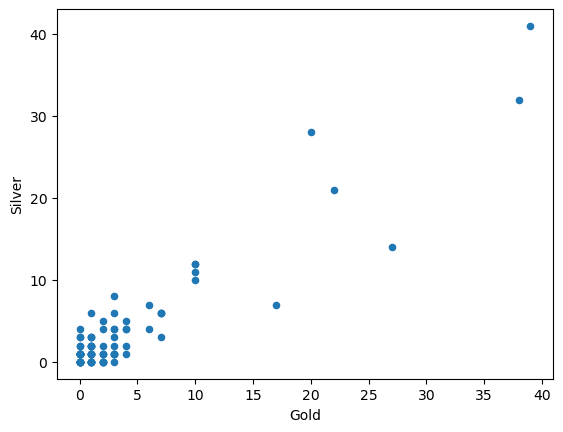

In [38]:
medal_count.plot.scatter(x="Gold",y='Silver')

## Exploring Two or more variables

<Axes: xlabel='Gold', ylabel='Total'>

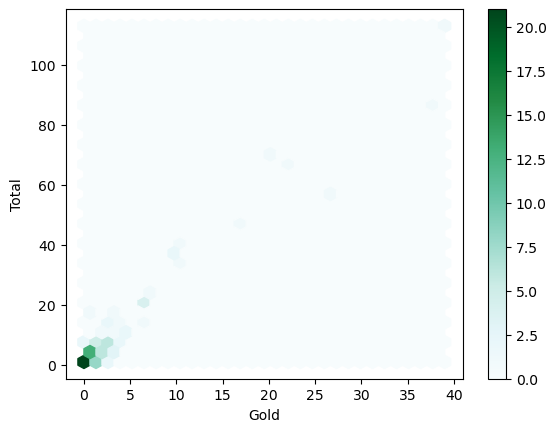

In [41]:
medal_count.plot.hexbin(x="Gold",y="Total",gridsize=30,sharex=False)

<Axes: >

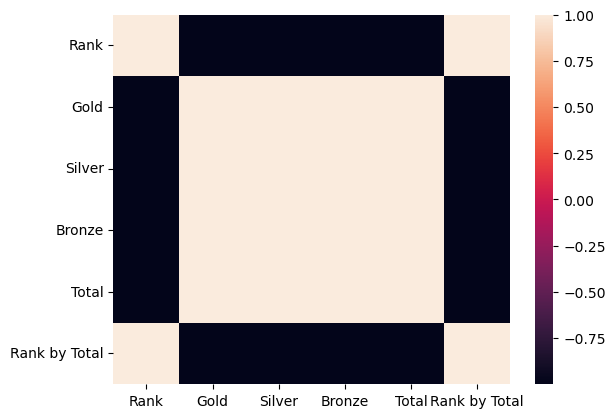

In [44]:
import seaborn as sns 
sns.heatmap(correlation_matrix.corr())

<Axes: xlabel='Gold'>

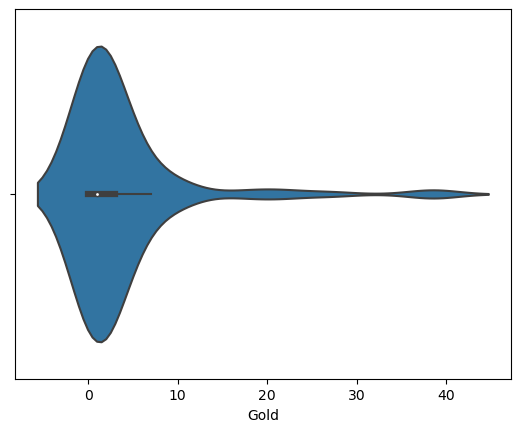

In [45]:
sns.violinplot(x=medal_count["Gold"])